# Homework w08d03 - Linear Discriminant Analysis

#### 1. Load the Boston housing dataset from sklearn. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

boston = datasets.load_boston()
X = boston.data; y = boston.target

target_names = boston.feature_names

#### 2. Transform the continuous target variable into four different class label according to which quartile of y the given the value belongs.

Hint: You can use the pandas describe function to determine the interquartile ranges.

In [4]:
y_descr = pd.Series(boston.target).describe()
y_descr

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

In [5]:
y = []
for b in boston.target:
    if b > y_descr[6]:
        y.append(3)
    elif b > y_descr[5]:
        y.append(2)
    elif b > y_descr[4]:
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

#### 3. Use dimensional reduction on the dataset. 
#### a) Transform to the first two principal components and determine the variance explained. Show a scatter plot in these two principal components with the points coloured according to their class. 
#### b) Transform to the first two LDA components. Show a scatter plot in these two  components with the points coloured according to their class. 
#### c) Describe the differences apparent from the scatter plots.

explained variance ratio (first two components): [ 0.47097344  0.11015872]
explained variance ratio (first two components): [ 0.84258844  0.14165248]


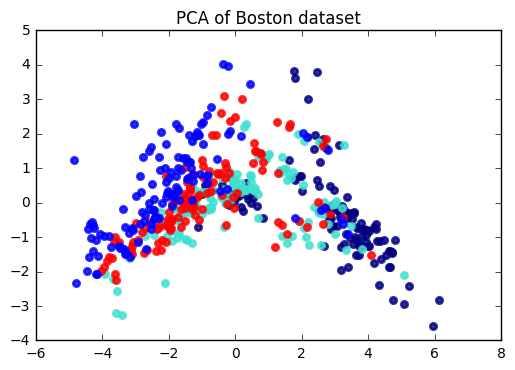

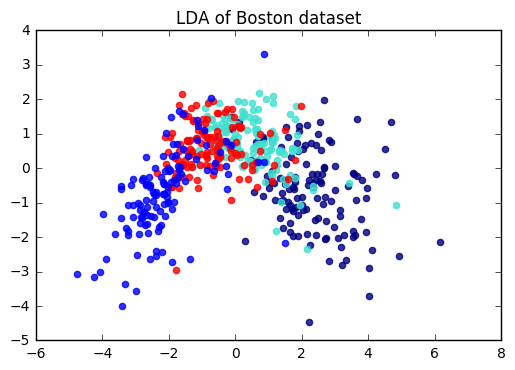

In [41]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_r = pca.fit(X_scaled).transform(X_scaled)

lda = LDA(n_components=2)
X_r2 = lda.fit(X_scaled, y).transform(X_scaled)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))



plt.figure()
colors = ['navy', 'turquoise', 'r', 'b']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Boston dataset')

plt.figure()
for color, i in zip(colors, [0, 1, 2, 3]):
    plt.scatter(-X_r2[y == i, 0], -X_r2[y == i, 1], alpha=.8, color=color)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Boston dataset')

plt.show()


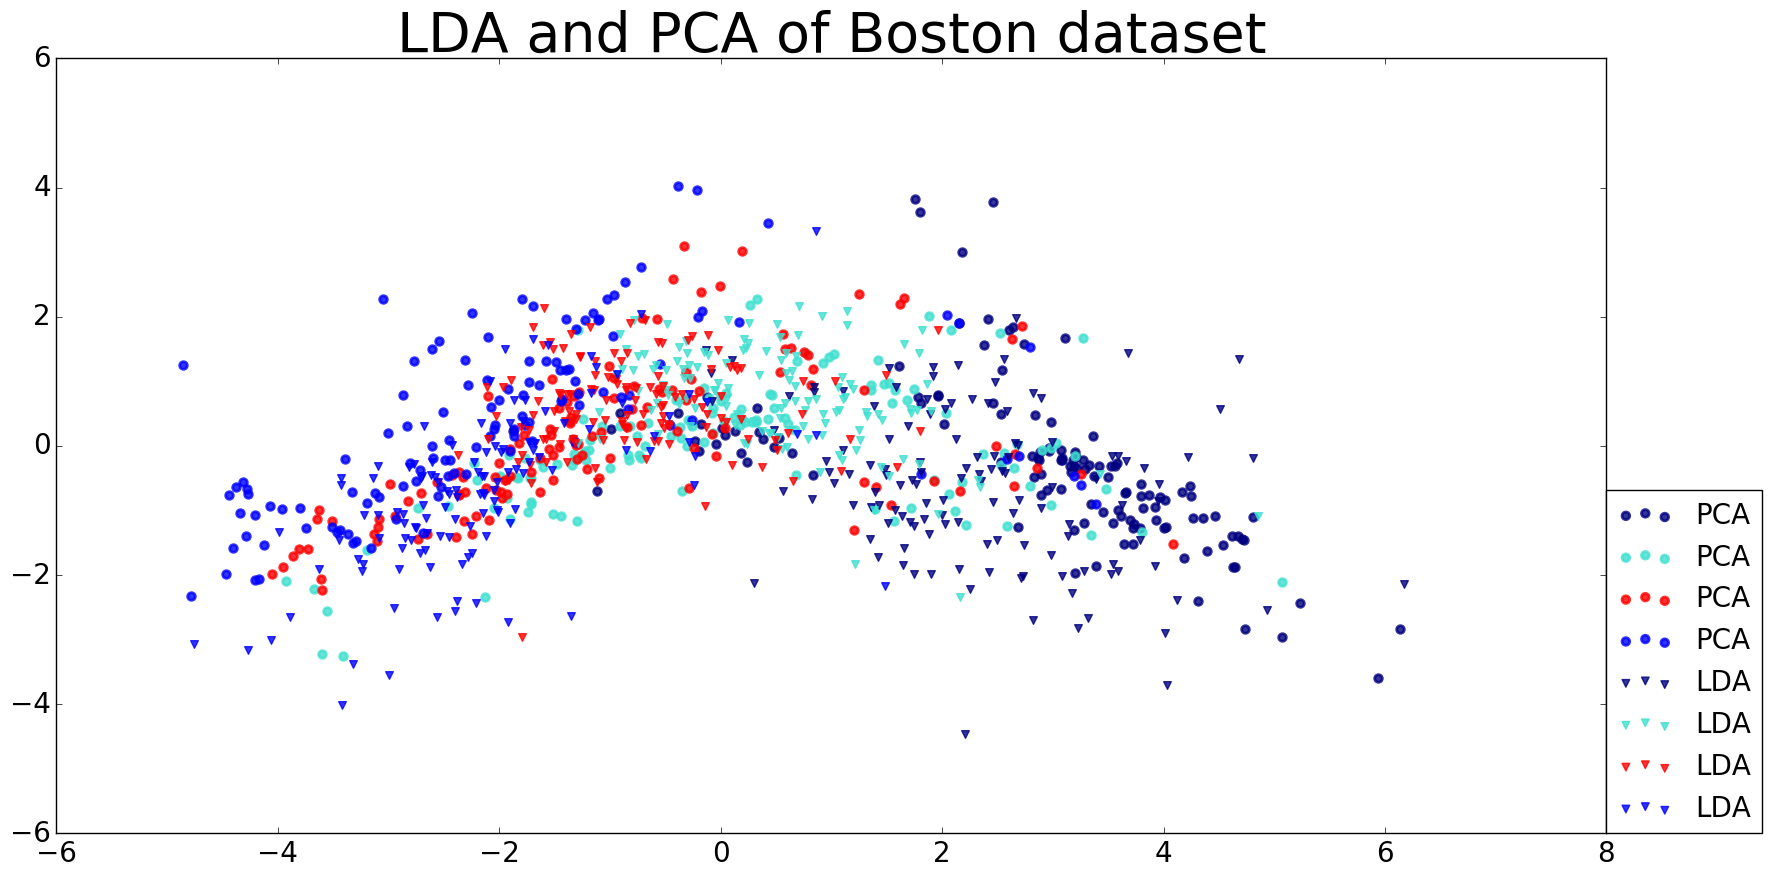

In [77]:

fig, ax = plt.subplots(figsize=(20,10))

for color, i in zip(colors, [0, 1, 2, 3]):
    ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color,s=30, 
               marker='o',alpha=.8, lw=lw,label='PCA')

for color, i in zip(colors, [0, 1, 2, 3]):
    ax.scatter(-X_r2[y == i, 0], -X_r2[y == i, 1], 
               alpha=.8, s=30,marker='v',color=color,label='LDA')


ax.legend(loc=[1,0],fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('LDA and PCA of Boston dataset',fontsize=40)
plt.show()

#### 4.  Now split the LDA transformed dataset into a training (70 %) and a test set and fit the data. Obtain the training and test accuracy scores, confusion matrix and classification report. 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_r2, y, test_size=0.3, random_state=0)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 2), (354,), (152, 2), (152,))

In [19]:
lda.fit(X_train,y_train)
pred_train = lda.predict(X_train)
pred_test = lda.predict(X_test)

In [20]:
from sklearn import metrics

In [21]:
print metrics.accuracy_score(y_train,pred_train)
print metrics.classification_report(y_train,pred_train)
print metrics.confusion_matrix(y_train,pred_train)
print metrics.accuracy_score(y_test,pred_test)
print metrics.classification_report(y_test,pred_test)
print metrics.confusion_matrix(y_test,pred_test)

0.734463276836
             precision    recall  f1-score   support

          0       0.87      0.83      0.85        87
          1       0.62      0.62      0.62        89
          2       0.60      0.70      0.65        88
          3       0.90      0.79      0.84        90

avg / total       0.75      0.73      0.74       354

[[72 15  0  0]
 [10 55 24  0]
 [ 1 17 62  8]
 [ 0  1 18 71]]
0.710526315789
             precision    recall  f1-score   support

          0       0.86      0.80      0.83        40
          1       0.59      0.65      0.62        40
          2       0.59      0.68      0.63        38
          3       0.89      0.71      0.79        34

avg / total       0.73      0.71      0.72       152

[[32  8  0  0]
 [ 3 26 11  0]
 [ 1  8 26  3]
 [ 1  2  7 24]]
